In [56]:
from glob import glob
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import pandas as pd

# statistics
from astropy.stats import biweight_location, biweight_scale, sigma_clipped_stats
from scipy.stats import median_abs_deviation

# configuration
np.set_printoptions(linewidth=120) # para que se vea
plt.rcParams["image.cmap"] = "gray" # https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.rcParams["image.origin"] = "lower"

def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

In [2]:
glob('*')

['Codigo_lab3.ipynb', 'Toma de datos 11-03', 'Toma de datos 11-03.zip']

In [3]:
files_ = glob("Toma de datos 11-03/*.fit")
files_

['Toma de datos 11-03\\bias1.fit',
 'Toma de datos 11-03\\bias10.fit',
 'Toma de datos 11-03\\bias100.fit',
 'Toma de datos 11-03\\bias11.fit',
 'Toma de datos 11-03\\bias12.fit',
 'Toma de datos 11-03\\bias13.fit',
 'Toma de datos 11-03\\bias14.fit',
 'Toma de datos 11-03\\bias15.fit',
 'Toma de datos 11-03\\bias16.fit',
 'Toma de datos 11-03\\bias17.fit',
 'Toma de datos 11-03\\bias18.fit',
 'Toma de datos 11-03\\bias19.fit',
 'Toma de datos 11-03\\bias2.fit',
 'Toma de datos 11-03\\bias20.fit',
 'Toma de datos 11-03\\bias21.fit',
 'Toma de datos 11-03\\bias22.fit',
 'Toma de datos 11-03\\bias23.fit',
 'Toma de datos 11-03\\bias24.fit',
 'Toma de datos 11-03\\bias25.fit',
 'Toma de datos 11-03\\bias26.fit',
 'Toma de datos 11-03\\bias27.fit',
 'Toma de datos 11-03\\bias28.fit',
 'Toma de datos 11-03\\bias29.fit',
 'Toma de datos 11-03\\bias3.fit',
 'Toma de datos 11-03\\bias30.fit',
 'Toma de datos 11-03\\bias31.fit',
 'Toma de datos 11-03\\bias32.fit',
 'Toma de datos 11-03\\bias33.

In [5]:
for file in files_:
    print(fits.info(file))

Filename: Toma de datos 11-03\bias1.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (765, 510)   int16 (rescales to uint16)   
None
Filename: Toma de datos 11-03\bias10.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (765, 510)   int16 (rescales to uint16)   
None
Filename: Toma de datos 11-03\bias100.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (765, 510)   int16 (rescales to uint16)   
None
Filename: Toma de datos 11-03\bias11.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (765, 510)   int16 (rescales to uint16)   
None
Filename: Toma de datos 11-03\bias12.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (765, 510)   int16 (rescales to uint16)   
None
Filename: Toma de datos 11-03\bias1

In [32]:
len(files_)

140

In [153]:

bias1 = files_[18]
bias2 = files_[14]
bias1

'Toma de datos 11-03\\bias25.fit'

In [154]:
#Primer par de flats
flat1 = files_[139]
flat2 = files_[138]
flat1, flat2

('Toma de datos 11-03\\FLAT0254.fit', 'Toma de datos 11-03\\FLAT0253.fit')

In [22]:
headers = [fits.getheader(f) for f in files_]
headers


[SIMPLE  =                    T / file does conform to FITS standard             
 BITPIX  =                   16 / number of bits per data pixel                  
 NAXIS   =                    2 / number of data axes                            
 NAXIS1  =                  765 / length of data axis 1                          
 NAXIS2  =                  510 / length of data axis 2                          
 EXTEND  =                    T / FITS dataset may contain extensions            
 BZERO   =                32768 / offset data range to that of unsigned short    
 BSCALE  =                    1 / default scaling factor                         
 MEAN    =     1053.86109188774 / [adu] mean value for all pixels                
 SIGMA   =     21.1794583268064 / [adu] std sigma value for all pixels           
 DATAMAX =                1197. / [adu] maximum value for all pixels             
 DATAMIN =                 974. / [adu] minimum value for all pixels             
 BGMEAN  =      

In [35]:
headers_flat1 = fits.getheader(flat1)
headers_flat2 = fits.getheader(flat2)
headers_flat2

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  765 / length of data axis 1                          
NAXIS2  =                  510 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
MEAN    =     62989.4972087652 / [adu] mean value for all pixels                
SIGMA   =      3703.2093723971 / [adu] std sigma value for all pixels           
DATAMAX =               65535. / [adu] maximum value for all pixels             
DATAMIN =                1601. / [adu] minimum value for all pixels             
BGMEAN  =             63851.

In [28]:
headers_bias1 = fits.getheader(bias1)
headers_bias2 = fits.getheader(bias2)
headers_bias2

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  765 / length of data axis 1                          
NAXIS2  =                  510 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
MEAN    =     1052.68410867615 / [adu] mean value for all pixels                
SIGMA   =     21.2259937131051 / [adu] std sigma value for all pixels           
DATAMAX =                1182. / [adu] maximum value for all pixels             
DATAMIN =                 974. / [adu] minimum value for all pixels             
BGMEAN  =             1048.8

In [27]:
mean_flat1 = headers_flat1["MEAN"]
sigma_flat1 = headers_flat1["SIGMA"]

mean_flat2 = headers_flat2["MEAN"]
sigma_flat2 = headers_flat2["SIGMA"]
mean_flat2,sigma_flat2

(54891.2480891961, 3237.72380864735)

In [29]:
mean_bias1 = headers_bias1["MEAN"]
sigma_bias1 = headers_bias1["SIGMA"]

mean_bias2 = headers_bias2["MEAN"]
sigma_bias2 = headers_bias2["SIGMA"]
mean_bias2,sigma_bias2

(1052.68410867615, 21.2259937131051)

In [30]:
datos_bias1 = fits.getdata(bias1)

Text(0.5, 1.0, 'Bias 1')

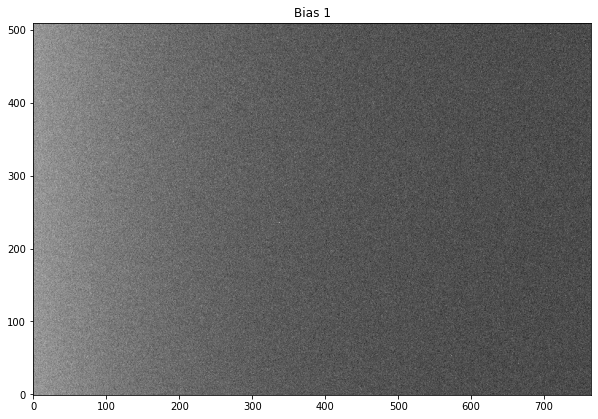

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(datos_bias1)
plt.title('Bias 1')

In [38]:
datos_flat1 = fits.getdata(flat1)
datos_flat2 = fits.getdata(flat2)
copy_flat1 = datos_flat1.copy()
copy_flat2 = datos_flat2.copy()

Voy a usar el bias 1 como dark para la calibración  del primer par de flats: flat1 = FLAT0254 y flat2 = FLAT0253

Text(0.5, 1.0, 'Flat 1')

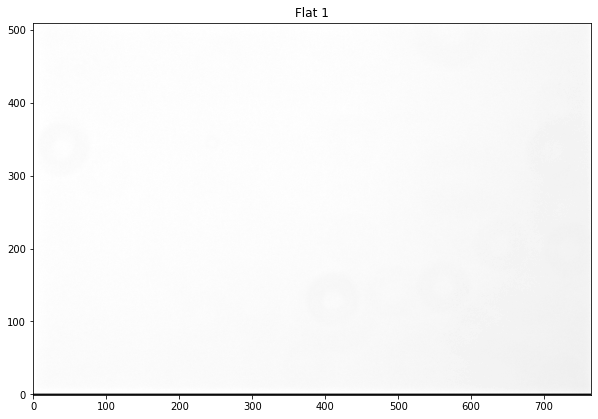

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(copy_flat1)
plt.title('Flat 1')

In [44]:
copy_flat1

array([[ 2958,  3031,  2974, ...,  1666,  1635,  1692],
       [11276, 11319, 11357, ...,  9295,  9726,  9568],
       [65535, 65535, 65535, ..., 63679, 63130, 63823],
       ...,
       [65535, 65535, 65535, ..., 64132, 64224, 64759],
       [65535, 65535, 65535, ..., 64189, 64059, 64801],
       [65535, 65535, 65535, ..., 64509, 64173, 64595]], dtype=uint16)

In [45]:
datos_bias1

array([[1112, 1102, 1097, ..., 1032, 1032, 1024],
       [1092, 1104, 1086, ..., 1018, 1026, 1038],
       [1095, 1108, 1111, ..., 1021, 1042, 1061],
       ...,
       [1100, 1128, 1088, ..., 1049, 1028, 1043],
       [1083, 1105, 1108, ..., 1033, 1028, 1033],
       [1093, 1101, 1098, ..., 1042, 1042, 1039]], dtype=uint16)

In [46]:
"""img_no_bias=[]
for i in range(0,2):
    no_bias=img_cut[i]-img_cut[0]
    img_no_bias.append(no_bias)
    plt.sca(ax[i])
    quantile_imshow(no_bias)"""

flat1_dark = copy_flat1 - datos_bias1
flat1_dark

array([[ 1846,  1929,  1877, ...,   634,   603,   668],
       [10184, 10215, 10271, ...,  8277,  8700,  8530],
       [64440, 64427, 64424, ..., 62658, 62088, 62762],
       ...,
       [64435, 64407, 64447, ..., 63083, 63196, 63716],
       [64452, 64430, 64427, ..., 63156, 63031, 63768],
       [64442, 64434, 64437, ..., 63467, 63131, 63556]], dtype=uint16)

Text(0.5, 1.0, 'Flat1 - dark')

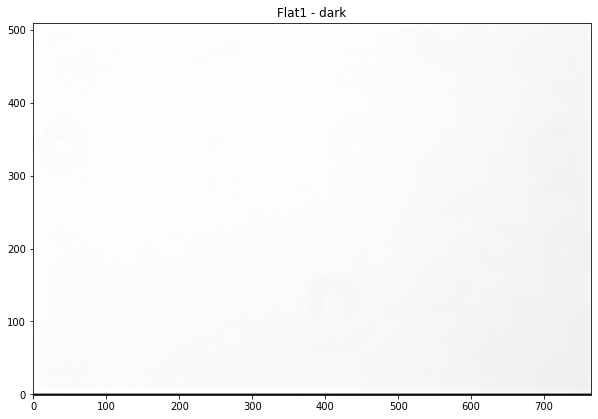

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(flat1_dark)
plt.title('Flat1 - dark')

Text(0.5, 1.0, 'Flat2')

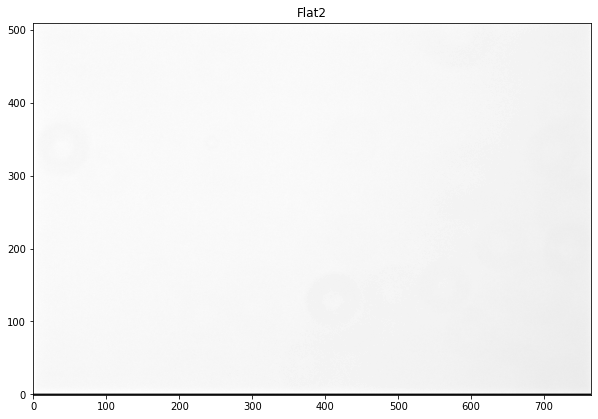

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(copy_flat2)
plt.title('Flat2')

In [50]:
flat2_dark = copy_flat2 - datos_bias1


In [51]:
summed_img1 = (flat1_dark + flat2_dark)/2
summed_img1

array([[ 1893.5,  1990.5,  1952.5, ...,   623.5,   598.5,   652. ],
       [10147.5, 10266.5, 10276. , ...,  8280. ,  8582. ,  8422. ],
       [31672. , 31659. , 31656. , ..., 29092. , 28911.5, 29406. ],
       ...,
       [31667. , 31639. , 31679. , ..., 29819.5, 29935.5, 30637.5],
       [31684. , 31662. , 31644. , ..., 29958. , 29935. , 30716. ],
       [31674. , 31666. , 31669. , ..., 29971.5, 29986.5, 30211.5]])

Text(0.5, 1.0, 'Imagen sumada')

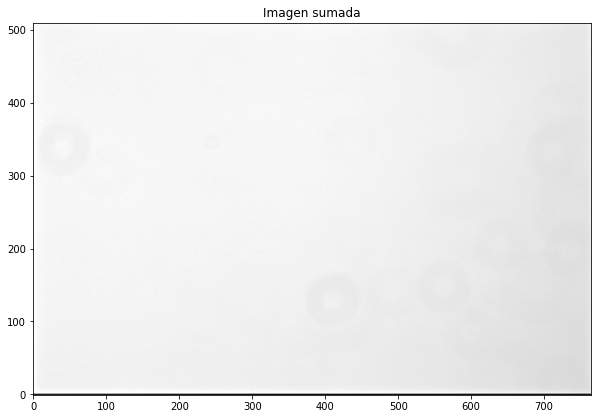

In [61]:
plt.figure(figsize=(10,10))
plt.imshow(summed_img1)
plt.title('Imagen sumada')
#plt.savefig('Imagen sumada primer par flats.fit')

Text(0.5, 1.0, 'Difference image')

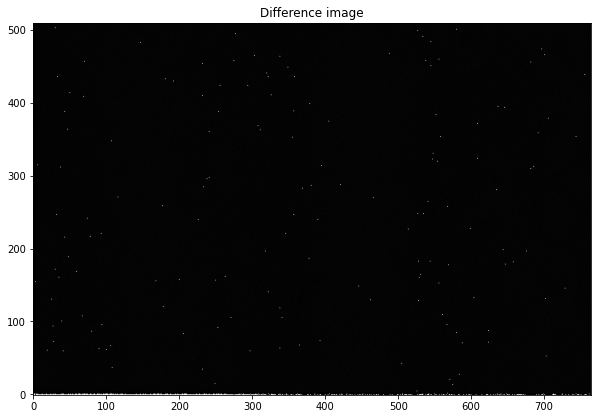

In [62]:
diff_img = flat1_dark - flat2_dark
plt.figure(figsize=(10,10))
plt.imshow(diff_img)
plt.title('Difference image')
#plt.savefig('Difference image primer par de flats.png')

Text(0.5, 1.0, 'Box imagen sumada')

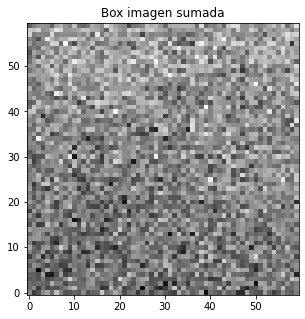

In [66]:
box1 = summed_img1[40:100,40:100]
plt.figure(figsize=(5,5))
plt.imshow(box1)
plt.title('Box imagen sumada')
#plt.savefig('Imagen sumada primer par flats.fit')

In [67]:
mean_level1 = box1.mean()
mean_level1

30101.405555555557

In [68]:
box_difference_img1 = diff_img[40:100,40:100]
std_box_diff1 = box_difference_img1.std()
std_box_diff1


2170.567513364596

In [69]:
std_box_sum1 = box1.std()

In [126]:
#variance1 = (std_box_diff1*std_box_sum1)/2
variance1 = box_difference_img1.var()
variance1

4711363.330073765

In [72]:
#Segundo par de flats
flat3 = files_[120]
flat4 = files_[121]
flat3, flat4

('Toma de datos 11-03\\FLAT0161.fit', 'Toma de datos 11-03\\FLAT0162.fit')

Para el segundo par de flats usaré el bias 121 y los flats: FLAT0161 y FLAT0162

In [74]:
datos_flat3 = fits.getdata(flat3)
datos_flat4 = fits.getdata(flat4)
copy_flat3 = datos_flat3.copy()
copy_flat4 = datos_flat4.copy()
datos_bias2 = fits.getdata(bias2)

In [89]:

flat3_dark = copy_flat3 - datos_bias1
flat4_dark = copy_flat4 - datos_bias1
flat3_dark, flat4_dark

(array([[ 1551,  1582,  1566, ...,   378,   378,   390],
        [ 6560,  6568,  6514, ...,  4911,  5180,  5032],
        [41168, 40638, 40681, ..., 38090, 38243, 38462],
        ...,
        [41412, 40903, 40126, ..., 38591, 38557, 38611],
        [41573, 40898, 40592, ..., 38350, 38606, 39101],
        [41696, 40553, 40422, ..., 38914, 38690, 38841]], dtype=uint16),
 array([[ 2066,  2115,  2064, ...,   379,   405,   414],
        [ 7096,  7039,  7041, ...,  5056,  5257,  5071],
        [41589, 41191, 40621, ..., 38336, 38426, 38814],
        ...,
        [41602, 41100, 40850, ..., 38688, 38646, 39153],
        [41990, 40812, 40787, ..., 38728, 38774, 39392],
        [41690, 41344, 40741, ..., 38840, 38741, 39241]], dtype=uint16))

In [90]:
summed_img2 = (flat3_dark + flat4_dark)/2
summed_img2

array([[1808.5, 1848.5, 1815. , ...,  378.5,  391.5,  402. ],
       [6828. , 6803.5, 6777.5, ..., 4983.5, 5218.5, 5051.5],
       [8610.5, 8146.5, 7883. , ..., 5445. , 5566.5, 5870. ],
       ...,
       [8739. , 8233.5, 7720. , ..., 5871.5, 5833.5, 6114. ],
       [9013.5, 8087. , 7921.5, ..., 5771. , 5922. , 6478.5],
       [8925. , 8180.5, 7813.5, ..., 6109. , 5947.5, 6273. ]])

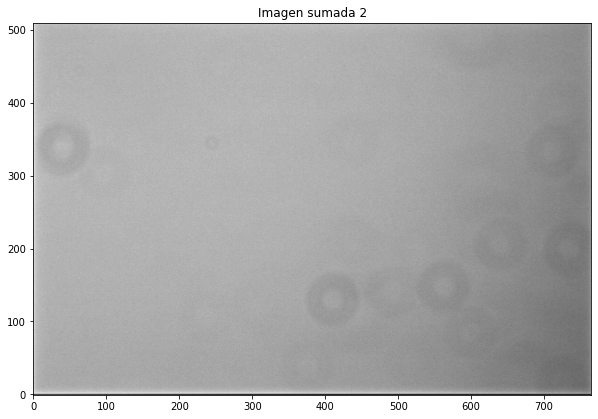

In [91]:
plt.figure(figsize=(10,10))
plt.imshow(summed_img2)
plt.title('Imagen sumada 2')
plt.savefig('Imagen sumada segundo par flats.png')

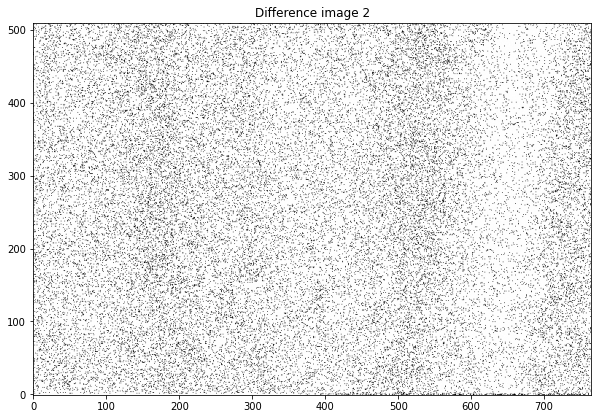

In [92]:
diff_img2 = flat3_dark - flat4_dark
plt.figure(figsize=(10,10))
plt.imshow(diff_img2)
plt.title('Difference image 2')
plt.savefig('Difference image segundo par de flats.png')

Text(0.5, 1.0, 'Box imagen sumada 2')

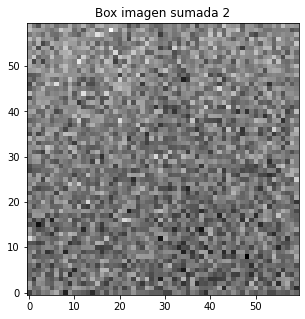

In [93]:
box2 = summed_img2[40:100,40:100]
plt.figure(figsize=(5,5))
plt.imshow(box2)
plt.title('Box imagen sumada 2')
#plt.savefig('Imagen sumada primer par flats.fit')

In [94]:
mean_level2 = box2.mean()
mean_level2

6476.283888888889

In [128]:
box_difference_img2 = diff_img2[40:100,40:100]
std_box_diff2 = box_difference_img2.std()

std_box_sum2 = box2.std()
#variance2 = (std_box_diff2*std_box_sum2)/2
variance2 = box_difference_img2.var()
variance2

351773945.26406634

In [96]:
variance1, variance2

(204061.19996255415, 1283105.2955189922)

In [87]:
#Tercer par de flats
flat5 = files_[100]
flat6 = files_[101]
bias3 = files_[5]
flat5, flat6, bias3

('Toma de datos 11-03\\FLAT0041.fit',
 'Toma de datos 11-03\\FLAT0042.fit',
 'Toma de datos 11-03\\bias13.fit')

Para el tercer par de flats usaré bias13, FLAT0041, FLAT0042

In [88]:
datos_flat5 = fits.getdata(flat5)
datos_flat6 = fits.getdata(flat6)
copy_flat5 = datos_flat5.copy()
copy_flat6 = datos_flat6.copy()
datos_bias3 = fits.getdata(bias3)

In [97]:
flat5_dark = copy_flat5 - datos_bias1
flat6_dark = copy_flat6 - datos_bias1
flat5_dark, flat6_dark

(array([[ 4304,  4253,  4254, ...,   164,   189,   182],
        [ 5364,  5274,  5192, ...,  1366,  1399,  1345],
        [12037, 11912, 12020, ..., 10236, 10236, 10377],
        ...,
        [12236, 12186, 12061, ..., 10784, 10756, 10868],
        [12419, 12069, 11914, ..., 10830, 10807, 10840],
        [12077, 11857, 11659, ..., 10846, 10803, 10848]], dtype=uint16),
 array([[ 5084,  5127,  5070, ...,   516,   528,   484],
        [ 6100,  6038,  5996, ...,  1689,  1705,  1589],
        [12043, 11916, 11934, ..., 10125, 10241, 10371],
        ...,
        [12165, 12006, 11897, ..., 10517, 10495, 10611],
        [12055, 11765, 11800, ..., 10562, 10636, 10840],
        [11880, 11679, 11647, ..., 10507, 10558, 10705]], dtype=uint16))

In [98]:
summed_img3 = (flat5_dark + flat6_dark)/2
summed_img3

array([[ 4694. ,  4690. ,  4662. , ...,   340. ,   358.5,   333. ],
       [ 5732. ,  5656. ,  5594. , ...,  1527.5,  1552. ,  1467. ],
       [12040. , 11914. , 11977. , ..., 10180.5, 10238.5, 10374. ],
       ...,
       [12200.5, 12096. , 11979. , ..., 10650.5, 10625.5, 10739.5],
       [12237. , 11917. , 11857. , ..., 10696. , 10721.5, 10840. ],
       [11978.5, 11768. , 11653. , ..., 10676.5, 10680.5, 10776.5]])

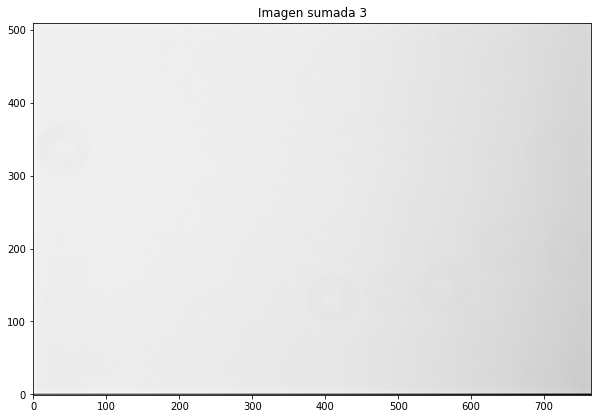

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(summed_img3)
plt.title('Imagen sumada 3')
plt.savefig('Imagen sumada tercer par flats.png')

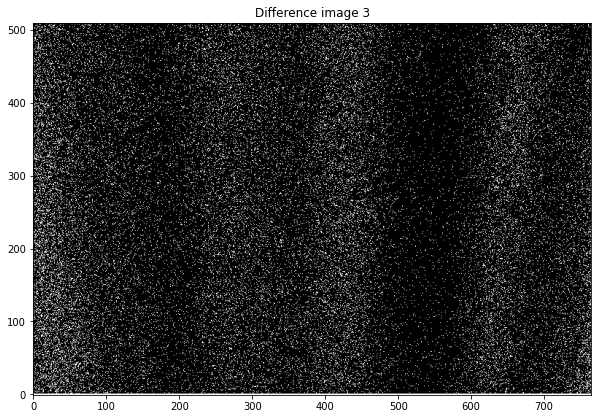

In [100]:
diff_img3 = flat5_dark - flat6_dark
plt.figure(figsize=(10,10))
plt.imshow(diff_img3)
plt.title('Difference image 3')
plt.savefig('Difference image tercer par de flats.png')

Text(0.5, 1.0, 'Box imagen sumada 3')

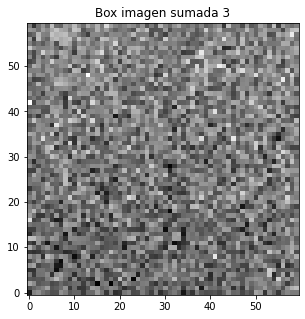

In [101]:
box3 = summed_img3[40:100,40:100]
plt.figure(figsize=(5,5))
plt.imshow(box3)
plt.title('Box imagen sumada 3')
#plt.savefig('Imagen sumada primer par flats.fit')

In [102]:
mean_level3 = box3.mean()
mean_level3

11488.989861111111

In [129]:
box_difference_img3 = diff_img3[40:100,40:100]
std_box_diff3 = box_difference_img3.std()

std_box_sum3 = box3.std()
#variance3 = (std_box_diff3*std_box_sum3)/2
variance3 = box_difference_img3.var()


In [130]:
variance1, variance2, variance3

(4711363.330073765, 351773945.26406634, 627973387.6081926)

In [135]:
#4to par de flats
flat7 = files_[109]
flat8 = files_[110]
flat7, flat8

('Toma de datos 11-03\\FLAT0092.fit', 'Toma de datos 11-03\\FLAT0093.fit')

Usaré el bias anterior y los flats: FLAT0092, FLAT0093

In [136]:
datos_flat7 = fits.getdata(flat7)
datos_flat8 = fits.getdata(flat8)
copy_flat7 = datos_flat7.copy()
copy_flat8 = datos_flat8.copy()
#datos_bias3 = fits.getdata(bias3)

In [137]:
flat7_dark = copy_flat7 - datos_bias1
flat8_dark = copy_flat8 - datos_bias1
flat7_dark, flat8_dark

(array([[ 1224,  1251,  1213, ...,   165,   191,   175],
        [ 3905,  3883,  3884, ...,  2418,  2438,  2413],
        [21851, 21798, 21354, ..., 18888, 18760, 18964],
        ...,
        [21987, 21594, 21277, ..., 19128, 19156, 19225],
        [21958, 21485, 21230, ..., 18916, 19106, 19270],
        [21925, 21533, 21480, ..., 19120, 18910, 19386]], dtype=uint16),
 array([[ 1502,  1408,  1563, ...,   215,   190,   201],
        [ 4052,  4112,  4004, ...,  2508,  2512,  2394],
        [21949, 21745, 21239, ..., 18876, 18851, 18857],
        ...,
        [21890, 21530, 21289, ..., 19027, 19417, 19390],
        [21901, 21651, 21217, ..., 19234, 19306, 19456],
        [21833, 21565, 21345, ..., 19512, 19195, 19451]], dtype=uint16))

In [138]:
summed_img4 = (flat7_dark + flat8_dark)/2
summed_img4

array([[ 1363. ,  1329.5,  1388. , ...,   190. ,   190.5,   188. ],
       [ 3978.5,  3997.5,  3944. , ...,  2463. ,  2475. ,  2403.5],
       [21900. , 21771.5, 21296.5, ..., 18882. , 18805.5, 18910.5],
       ...,
       [21938.5, 21562. , 21283. , ..., 19077.5, 19286.5, 19307.5],
       [21929.5, 21568. , 21223.5, ..., 19075. , 19206. , 19363. ],
       [21879. , 21549. , 21412.5, ..., 19316. , 19052.5, 19418.5]])

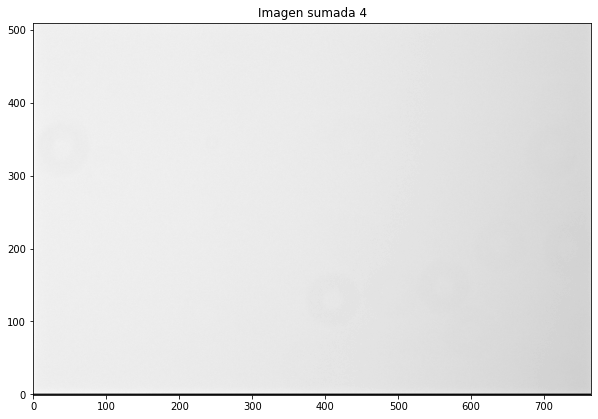

In [139]:
plt.figure(figsize=(10,10))
plt.imshow(summed_img4)
plt.title('Imagen sumada 4')
plt.savefig('Imagen sumadacuarto par flats.png')

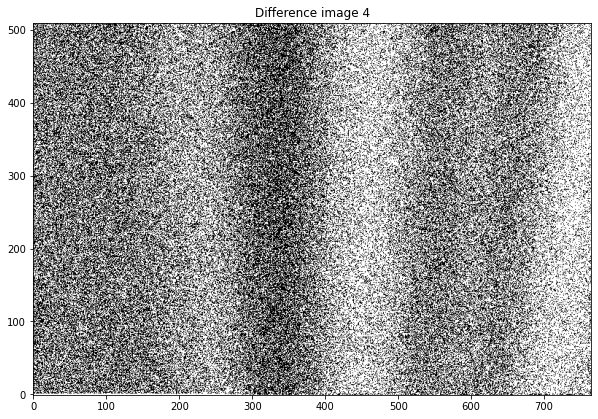

In [140]:
diff_img4 = flat7_dark - flat8_dark
plt.figure(figsize=(10,10))
plt.imshow(diff_img4)
plt.title('Difference image 4')
plt.savefig('Difference image cuarto par de flats.png')

Text(0.5, 1.0, 'Box imagen sumada 4')

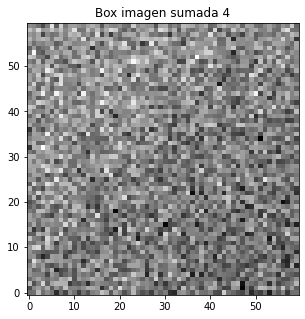

In [141]:
box4 = summed_img4[40:100,40:100]
plt.figure(figsize=(5,5))
plt.imshow(box4)
plt.title('Box imagen sumada 4')
#plt.savefig('Imagen sumada primer par flats.fit')

In [142]:
mean_level4 = box4.mean()
mean_level4

20637.9125

In [143]:
box_difference_img4 = diff_img4[40:100,40:100]
std_box_diff4 = box_difference_img4.std()

std_box_sum4 = box4.std()
#variance3 = (std_box_diff3*std_box_sum3)/2
variance4 = box_difference_img4.var()


In [147]:
mean_level = [mean_level2, mean_level3, mean_level4]
varianza = [variance2, variance3, variance4]

In [161]:
varianza

[351773945.26406634, 627973387.6081926, 1062052430.9365972]

Text(0, 0.5, 'Varianza dentro del cuadrado')

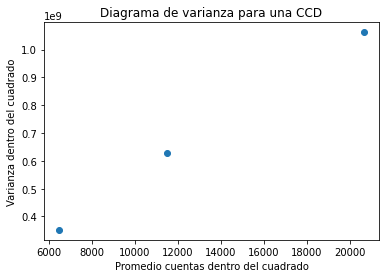

In [148]:
plt.scatter(mean_level, varianza)
plt.title('Diagrama de varianza para una CCD')
plt.xlabel('Promedio cuentas dentro del cuadrado')
plt.ylabel('Varianza dentro del cuadrado')

In [112]:
from scipy.optimize import curve_fit
from scipy.stats import linregress

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pendiente (m): 49823.76376522413
Intercepto b: 39481243.834635854
Residuales: [-10380137.127096593, 16067427.03250146, -5687289.905404687]


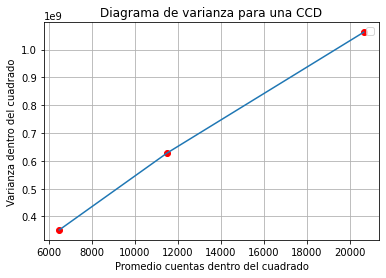

<Figure size 432x288 with 0 Axes>

In [151]:
slope, intercept, r_value, p_value, std_err= linregress(mean_level, varianza)
print(f'Pendiente (m): {slope}')
print(f'Intercepto b: {intercept}')
residuals = [varianza[i] - (slope * mean_level[i] + intercept) for i in range(len(mean_level))]
print(f'Residuales: {residuals}')
plt.scatter(mean_level, varianza, color='red')
plt.plot(mean_level, varianza)
#plt.errorbar(mean_level, varianza, xerr= 0.03 ,yerr=0.2, fmt='o', label='Barras de error experimentales de $K_{\\alpha}$', c='k', zorder=10, markersize=6,capsize=3)
plt.title('Diagrama de varianza para una CCD')
plt.xlabel('Promedio cuentas dentro del cuadrado')
plt.ylabel('Varianza dentro del cuadrado')
plt.legend()
plt.grid()
plt.show()
plt.savefig('Diagrama de varianza para una CCD.png')

In [150]:
gain = 1/slope
gain

2.007074384649314e-05

In [124]:
std_bias2 = datos_bias2.std()
diff_bias1_bias2 = datos_bias1 - datos_bias2
diff_b1b2_cut = diff_bias1_bias2[40:100,40:100]
std_b1b2 = diff_b1b2_cut.std()

In [152]:
ruido = gain*std_b1b2/(2**(1/2))
ruido

0.46484221819642163

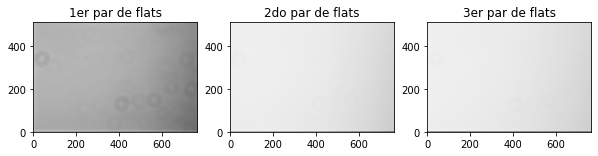

In [159]:
rows = 1
columns = 3

fig = plt.figure(figsize=(10, 7)) 
    
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(summed_img2) 
plt.axis() 
plt.title("1er par de flats") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(summed_img3) 
plt.axis() 
plt.title("2do par de flats") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
# showing image 
plt.imshow(summed_img4) 
plt.axis() 
plt.title("3er par de flats") 

fig.savefig('Imágenes sumadas.png')

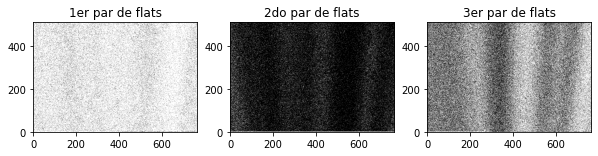

In [160]:
rows = 1
columns = 3

fig = plt.figure(figsize=(10, 7)) 
    
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(diff_img2) 
plt.axis() 
plt.title("1er par de flats") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(diff_img3) 
plt.axis() 
plt.title("2do par de flats") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
# showing image 
plt.imshow(diff_img4) 
plt.axis() 
plt.title("3er par de flats") 

fig.savefig('Imágenes diferencia.png')